In [1]:
# Import Packages I will need
from lex_processing import * 
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# To show plots in notebook
%matplotlib inline  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('classic')

from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy import stats

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from collections import Counter

In [2]:
# Path is where the data I want to process is.
# For Mac
pathReagan = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/ReaganSpeeches/'
pathBush = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/BushSpeeches/'
pathTrump = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/TrumpSpeeches/'
# For Linux
#pathReagan = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/ReaganSpeeches/'
#pathBush = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/BushSpeeches/'
#pathTrump = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/TrumpSpeeches/'
# For Windows
# pathReagan = '/Users/jomar/Dropbox/Data/Edited Data/Presidents Data/ReaganSpeeches/'
#pathBush = '/Users/jomar/Dropbox/Data/Edited Data/Presidents Data/BushSpeeches/'
#pathTrump = '/Users/jomar/Dropbox/Data/Edited Data/Presidents Data/TrumpSpeeches/'

In [3]:
# Create Data Frames for the datasets. I am including one data frame for 2 terms of Reagan
# and 2 separate dataframes for each term.
dfReagan = pd.DataFrame()
dfReaganTerm1 = pd.DataFrame()
dfReaganTerm2 = pd.DataFrame()
dfBush = pd.DataFrame()
dfTrump = pd.DataFrame()
LIWC = pd.DataFrame()

In [4]:
for filename in os.listdir(pathReagan):
    if filename.endswith('txt'):
        f = open(pathReagan + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('—')
        wordsNoPunct.replace("—", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing'] + c['everything']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfReagan = dfReagan.append(finalDict, ignore_index = True)

In [5]:
for filename in os.listdir(pathBush):
    if filename.endswith('txt'):
        f = open(pathBush + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('-')
        wordsNoPunct.replace("-", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfBush = dfBush.append(finalDict, ignore_index = True)

In [6]:
for filename in os.listdir(pathTrump):
    if filename.endswith('txt'):
        f = open(pathTrump + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('-')
        wordsNoPunct.replace("-", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfTrump = dfTrump.append(finalDict, ignore_index = True)

In [7]:
# For Mac
testpath = '/Users/Joe/Documents/NLP/'
# For Linux
# testpath = '/home/CAMPUS/alcantaj/Documents/NLP/'

In [8]:
LIWC = pd.read_csv(testpath + "LIWC2015Results.csv")

In [9]:
dfReagan = pd.merge(dfReagan, LIWC, on='Filename', how='inner')
dfTrump = pd.merge(dfTrump, LIWC, on='Filename', how='inner')
dfBush = pd.merge(dfBush, LIWC, on='Filename', how='inner')

In [10]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfReagan] 
        + [col for col in dfReagan if col not in inserted_cols])
dfReagan = dfReagan[cols]

In [11]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfBush] 
        + [col for col in dfBush if col not in inserted_cols])
dfBush = dfBush[cols]

In [12]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfTrump] 
        + [col for col in dfTrump if col not in inserted_cols])
dfTrump = dfTrump[cols]

In [13]:
# Fill NA's with 0s as in this dataset, NAN represent the feature NOT occuring in a particular document.
dfReagan = dfReagan.fillna(0)
dfBush = dfBush.fillna(0)
dfTrump = dfTrump.fillna(0)

In [14]:
# Output 
dfReagan.to_csv('testReagan.csv')
dfBush.to_csv('testBush.csv')
dfTrump.to_csv('testTrump.csv')

In [15]:
a = pd.read_csv(testpath + "dates.csv")
b = pd.read_csv(testpath + "testReagan.csv")

c = pd.read_csv(testpath + "dates2.csv")
d = pd.read_csv(testpath + "testBush.csv")

e = pd.read_csv(testpath + "dates3.csv")
f = pd.read_csv(testpath + "testTrump.csv")

In [16]:
a['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in a['Date']]
c['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in c['Date']]
e['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in e['Date']]

In [17]:
a['Julian'] = [get_julian_datetime(x) for x in a['JDate']]
c['Julian'] = [get_julian_datetime(x) for x in c['JDate']]
e['Julian'] = [get_julian_datetime(x) for x in e['JDate']]

In [18]:
dfReagan = a.merge(b, on='Filename')
dfBush = c.merge(d, on='Filename')
dfTrump = e.merge(f, on='Filename')

In [19]:
dfReagan = dfReagan.sort_values(by=['JDate'])
dfBush = dfBush.sort_values(by=['JDate'])
dfTrump = dfTrump.sort_values(by=['JDate'])

In [20]:
# Create new labels (Index is in order of article date)
dfReagan = dfReagan.reset_index()
dfReagan['index'] = dfReagan.index
dfBush = dfBush.reset_index()
dfBush['index'] = dfBush.index
dfTrump = dfTrump.reset_index()
dfTrump['index'] = dfTrump.index

In [21]:
# Dropping Redundant Columns
dfReagan = dfReagan.drop(['Unnamed: 0'], axis=1)
dfBush = dfBush.drop(['Unnamed: 0'], axis=1)
dfTrump = dfTrump.drop(['Unnamed: 0'], axis=1)

In [22]:
# Calculate some new aggregate columns
dfReagan['Nouns'] = dfReagan['NN'] + dfReagan['NNS']+ dfReagan['NNP'] + dfReagan['NNPS']
dfReagan['Nouns/100'] = dfReagan['Nouns'] / 100
dfReagan['NounsNormalised'] = dfReagan['Nouns'] / dfReagan['WordCount']
dfReagan['Adjectives'] = dfReagan['JJ'] + dfReagan['JJR'] + dfReagan['JJS']
dfReagan['Adjectives/100'] = dfReagan['Adjectives'] / 100
dfReagan['AdjectivesNormalised'] = dfReagan['Adjectives'] / dfReagan['WordCount']
dfReagan['Adverbs'] = dfReagan['RB'] + dfReagan['RBR'] + dfReagan['RBS']
dfReagan['Adverbs/100'] = dfReagan['Adverbs'] / 100
dfReagan['AdverbsNormalised'] = dfReagan['Adverbs'] / dfReagan['WordCount']
dfReagan['Verbs'] = dfReagan['VB'] + dfReagan['VBD'] + dfReagan['VBG'] + dfReagan['VBN'] + dfReagan['VBP'] + dfReagan['VBZ']
dfReagan['Verbs/100'] = dfReagan['Verbs'] / 100
dfReagan['VerbsNormalised'] = dfReagan['Verbs'] / dfReagan['WordCount']
dfReagan['Pronouns'] = dfReagan['PRP'] + dfReagan['PRP$']
dfReagan['PronounsNormalised'] = dfReagan['Pronouns'] / dfReagan['WordCount']

In [23]:
# Calculate some new aggregate columns
dfBush['Nouns'] = dfBush['NN'] + dfBush['NNS']+ dfBush['NNP'] + dfBush['NNPS']
dfBush['Nouns/100'] = dfBush['Nouns'] / 100
dfBush['NounsNormalised'] = dfBush['Nouns'] / dfBush['WordCount']
dfBush['Adjectives'] = dfBush['JJ'] + dfBush['JJR'] + dfBush['JJS']
dfBush['Adjectives/100'] = dfBush['Adjectives'] / 100
dfBush['AdjectivesNormalised'] = dfBush['Adjectives'] / dfBush['WordCount']
dfBush['Adverbs'] = dfBush['RB'] + dfBush['RBR'] + dfBush['RBS']
dfBush['Adverbs/100'] = dfBush['Adverbs'] / 100
dfBush['AdverbsNormalised'] = dfBush['Adverbs'] / dfBush['WordCount']
dfBush['Verbs'] = dfBush['VB'] + dfBush['VBD'] + dfBush['VBG'] + dfBush['VBN'] + dfBush['VBP'] + dfBush['VBZ']
dfBush['Verbs/100'] = dfBush['Verbs'] / 100
dfBush['VerbsNormalised'] = dfBush['Verbs'] / dfBush['WordCount']
dfBush['Pronouns'] = dfBush['PRP'] + dfBush['PRP$']
dfBush['PronounsNormalised'] = dfBush['Pronouns'] / dfBush['WordCount']

In [24]:
# Calculate some new aggregate columns
dfTrump['Nouns'] = dfTrump['NN'] + dfTrump['NNS']+ dfTrump['NNP'] + dfTrump['NNPS']
dfTrump['Nouns/100'] = dfTrump['Nouns'] / 100
dfTrump['NounsNormalised'] = dfTrump['Nouns'] / dfTrump['WordCount']
dfTrump['Adjectives'] = dfTrump['JJ'] + dfTrump['JJR'] + dfTrump['JJS']
dfTrump['Adjectives/100'] = dfTrump['Adjectives'] / 100
dfTrump['AdjectivesNormalised'] = dfTrump['Adjectives'] / dfTrump['WordCount']
dfTrump['Adverbs'] = dfTrump['RB'] + dfTrump['RBR'] + dfTrump['RBS']
dfTrump['Adverbs/100'] = dfTrump['Adverbs'] / 100
dfTrump['AdverbsNormalised'] = dfTrump['Adverbs'] / dfTrump['WordCount']
dfTrump['Verbs'] = dfTrump['VB'] + dfTrump['VBD'] + dfTrump['VBG'] + dfTrump['VBN'] + dfTrump['VBP'] + dfTrump['VBZ']
dfTrump['Verbs/100'] = dfTrump['Verbs'] / 100
dfTrump['VerbsNormalised'] = dfTrump['Verbs'] / dfTrump['WordCount']
dfTrump['Pronouns'] = dfTrump['PRP'] + dfTrump['PRP$']
dfTrump['PronounsNormalised'] = dfTrump['Pronouns'] / dfTrump['WordCount']

Need to split data here
Logic
For dfRR where Date is between 01/01/1981 and 31/01/1985 copy data into dfRRTerm1
For dfRR where Date is not between 01/01/1981 and 31/01/1985 copy data into dfRRTerm2

In [25]:
dfReaganTerm1 = dfReagan[dfReagan.JDate < pd.Timestamp(1985, 1, 31)]
dfReaganTerm2 = dfReagan[dfReagan.JDate > pd.Timestamp(1985, 1, 31)]

In [26]:
dfReaganTerm1 = dfReaganTerm1.reset_index()
dfReaganTerm1['index'] = dfReaganTerm1.index
dfReaganTerm2 = dfReaganTerm2.reset_index()
dfReaganTerm2['index'] = dfReaganTerm2.index

dfReaganTerm1 = dfReaganTerm1.drop(['level_0'], axis=1)
dfReaganTerm2 = dfReaganTerm2.drop(['level_0'], axis=1)

In [27]:
# Add Target Variable
yReagan = dfReagan['index']
yReaganTerm1 = dfReaganTerm1['index']
yReaganTerm2 = dfReaganTerm2['index']
yBush = dfBush['index']
yTrump = dfTrump['index']

#yRR = dfRR['Julian']
#yGWHB = dfGWHB['Julian']

In [28]:
# Export dataset to csv files
dfReagan.to_csv('Reagan.csv')
dfBush.to_csv('Bush.csv')
dfTrump.to_csv('Trump.csv')

Pearson's Correlations

In [29]:
resultsReagan = pd.DataFrame()
columnsReagan = list(dfReagan)

In [30]:
columnsReagan.remove('index')
columnsReagan.remove('Filename')
columnsReagan.remove('Date')
columnsReagan.remove('JDate')
columnsReagan.remove('Julian')

In [31]:
for i in columnsReagan:
    r, p = pearsonr(dfReagan[i], dfReagan['index'])
    pearsonResults = {'Index': i, 'RSquared':r, 'P-Value': p}
    resultsReagan = resultsReagan.append(pearsonResults, ignore_index=True)
    

/Users/Joe/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [32]:
resultsBush = pd.DataFrame()
columnsBush = list(dfBush)

In [33]:
columnsBush.remove('index')
columnsBush.remove('Filename')
columnsBush.remove('Date')
columnsBush.remove('JDate')
columnsBush.remove('Julian')

In [34]:
for i in columnsBush:
    r, p = pearsonr(dfBush[i], dfBush['index'])
    pearsonResults = {'Index': i, 'RSquared':r, 'P-Value': p}
    resultsBush = resultsBush.append(pearsonResults, ignore_index=True)
    

/Users/Joe/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [35]:
resultsTrump = pd.DataFrame()
columnsTrump = list(dfTrump)

In [36]:
columnsTrump.remove('index')
columnsTrump.remove('Filename')
columnsTrump.remove('Date')
columnsTrump.remove('JDate')
columnsTrump.remove('Julian')

In [37]:
for i in columnsTrump:
    r, p = pearsonr(dfTrump[i], dfTrump['index'])
    pearsonResults = {'Index': i, 'RSquared':r, 'P-Value': p}
    resultsTrump = resultsTrump.append(pearsonResults, ignore_index=True)
    

/Users/Joe/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [38]:
subsetReagan = pd.DataFrame()
subsetReagan = resultsReagan.loc[resultsReagan['P-Value'] < 0.05]
subsetReagan = subsetReagan.sort_values(by=['RSquared'])
subsetReagan

,Index,P-Value,RSquared
143,NounsNormalised,0.000000,-0.708304
49,Analytic,0.000001,-0.658395
20,NN,0.000018,-0.586757
2,UniqueWords,0.000044,-0.564363
142,Nouns/100,0.000050,-0.561273
141,Nouns,0.000050,-0.561273
40,WDT,0.000210,-0.520333
16,JJ,0.000225,-0.518294
65,article,0.000260,-0.513836
39,VBZ,0.000430,-0.497892


In [39]:
subsetBush = pd.DataFrame()
subsetBush = resultsBush.loc[resultsBush['P-Value'] < 0.05]
subsetBush = subsetBush.sort_values(by=['RSquared'])
subsetBush

,Index,P-Value,RSquared
137,Dash,0.000000,-0.606136
9,:,0.000000,-0.582767
133,Colon,0.000000,-0.459076
70,conj,0.000000,-0.447959
4,Fillers,0.000025,-0.357945
13,EX,0.000071,-0.338771
10,CC,0.000416,-0.302863
3,MLU,0.001126,-0.280432
20,NNP,0.001551,-0.272823
28,RP,0.002319,-0.262942


In [40]:
subsetTrump = pd.DataFrame()
subsetTrump = resultsTrump.loc[resultsTrump['P-Value'] < 0.05]
subsetTrump = subsetTrump.sort_values(by=['RSquared'])
subsetTrump

,Index,P-Value,RSquared
112,focusfuture,0.008307,-0.480664
72,adj,0.011407,-0.463114
68,adverb,0.019732,-0.430535
149,AdverbsNormalised,0.049187,-0.368497
114,motion,0.049267,-0.368377
21,NNPS,0.034769,0.393352
107,power,0.034658,0.393574
140,OtherP,0.033605,0.395701
11,CD,0.022845,0.421288
75,number,0.018067,0.435983


PLOTS

In [ ]:
# Calculated number of days from first speech to last speech. Better indicator of progress over time.

(0, 60.0)

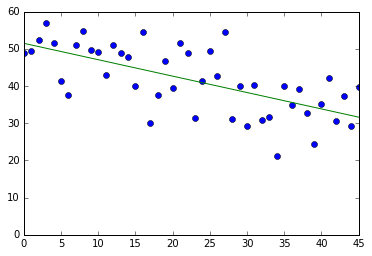

In [44]:
# Plot Mean Length of Utterance over time for RR
xs = dfReagan['index']
ys = dfReagan['Analytic']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.ylim((0))

(0, 0.21)

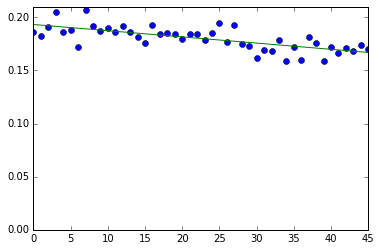

In [45]:
# Plot Mean Length of Utterance over time for RR
xs = dfReagan['index']
ys = dfReagan['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.ylim((0))

In [ ]:
# Plot Mean Length of Utterance over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['MLU']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.ylim((0))

In [ ]:
# Plot Mean Length of Utterance over time for DJT
xs = dfDJT['index']
ys = dfDJT['MLU']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.ylim((0))

In [ ]:
# Plot Unique Words over time for RR
xs = dfRR['index']
ys = dfRR['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.ylim((0, 1200))
plt.suptitle('Ronald Reagan - Unique Words')
plt.savefig('RRUniqueWords.png')

In [ ]:
# Plot Unique Words over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)
plt.suptitle('George Bush Snr - Unique Words')
plt.savefig('GWHBUniqueWords.png')

In [ ]:
# Plot Unique Words over time for DJT
xs = dfDJT['index']
ys = dfDJT['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Token Type Ratio over time for RR
xs = dfRR['index']
ys = dfRR['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Token Type Ratio over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Token Type Ratio over time for DJT
xs = dfDJT['index']
ys = dfDJT['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Word Count over time for RR
xs = dfRR['index']
ys = dfRR['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Word Count over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Word Count over time for DJT
xs = dfDJT['index']
ys = dfDJT['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

In [ ]:
# Plot Nouns per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Nouns per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Nouns per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Verbs per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Verbs per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Verbs per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adjectives per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adjectives per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adjectives per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adverbs per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adverbs per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
# Plot Adverbs per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfRR['index']
ys = dfRR['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)
plt.suptitle('RR - Nouns Normalised')
plt.savefig('RRNounsNorm.png')

In [ ]:
xs = dfGWHB['index']
ys = dfGWHB['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)
plt.suptitle('GWHB - Nouns Normalised')
plt.savefig('GWHBNounsNorm.png')

In [ ]:
xs = dfDJT['index']
ys = dfDJT['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)
plt.suptitle('DJT - Nouns Normalised')
plt.savefig('DJTNounsNorm.png')

In [ ]:
xs = dfRR['index']
ys = dfRR['AdjectivesNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfGWHB['index']
ys = dfGWHB['AdjectivesNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfDJT['index']
ys = dfDJT['AdjectivesNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfRR['index']
ys = dfRR['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfGWHB['index']
ys = dfGWHB['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfDJT['index']
ys = dfDJT['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfRR['index']
ys = dfRR['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)
plt.suptitle('Ronald Reagan - Non Specific Nouns')
plt.savefig('RRNSNouns.png')

In [ ]:
xs = dfGWHB['index']
ys = dfGWHB['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfDJT['index']
ys = dfDJT['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)
plt.suptitle('Donald Trump - Non Specific Nouns')
plt.savefig('DJTNSNouns.png')

In [ ]:
xs = dfRR['index']
ys = dfRR['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfGWHB['index']
ys = dfGWHB['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
xs = dfDJT['index']
ys = dfDJT['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [ ]:
labelsRR = dfRR['Filename']
dfRR = dfRR.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)
labelsGHWB = dfGWHB['Filename']
dfGWHB = dfGWHB.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)
labelsDJT = dfDJT['Filename']
dfDJT = dfDJT.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)

In [ ]:
# Scale the data
yRRscaled = preprocessing.scale(yRR)
dfRRscaled = preprocessing.scale(dfRR)

yGWHBscaled = preprocessing.scale(yGWHB)
dfGWHBscaled = preprocessing.scale(dfGWHB)

yDJTscaled = preprocessing.scale(yDJT)
dfDJTscaled = preprocessing.scale(dfDJT)

-- LINEAR REGRESSION --

In [ ]:
resultsGridRR = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfRRscaled, yRR, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridRR = resultsGridRR.append(resultsTuple, ignore_index=True)
    

In [ ]:
resultsGridGWHB = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfGWHBscaled, yGWHB, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridGWHB = resultsGridGWHB.append(resultsTuple, ignore_index=True)

In [ ]:
resultsGridDJT = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfDJTscaled, yDJT, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridDJT = resultsGridDJT.append(resultsTuple, ignore_index=True)

In [ ]:
resultsGridRR.describe()

In [ ]:
resultsGridGWHB.describe()

In [ ]:
resultsGridDJT.describe()

-- GAUSSIAN PROCESSES --

In [ ]:
# path = '/home/CAMPUS/alcantaj/Dropbox/'
path = '/Users/Joe/Documents/Coding/'
bush_df = pd.read_csv(path + 'Bush.csv')
reagan_df = pd.read_csv(path + 'Reagan.csv')

In [ ]:
minimum = reagan_df['Julian'].min() # Smallest Julian Date
maximum = reagan_df['Julian'].max() # Maximum Julian Date

In [ ]:
reagan_df['NormalisedDate'] = (reagan_df['Julian'] - minimum) / (maximum - minimum) 

In [ ]:
reagan_df['CountDays'] = reagan_df['Julian'] - minimum

In [ ]:
reagan_df['CountDaysN'] = reagan_df['CountDays'] / 365

In [ ]:
# NEED TO DROP DATA COLUMNS HERE BEFORE RUN MODEL
reagan_df = reagan_df.drop(['Unnamed: 0', 'Filename', 'index','Date', 'JDate', 'Julian',
                           'NormalisedDate', 'CountDays'], axis=1)

In [ ]:
target = reagan_df['CountDaysN']

In [ ]:
max_target = target.max()

In [ ]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(185, (1e-2, 1e4))
# kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=15)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)

In [ ]:
target = np.asarray(y_train)
variables = np.asarray(X_train)

In [ ]:
# Fit to data using Maximum Likelihood Estimation of the parameters
model = gp.fit(variables, target) # This looks fine according to documentation

In [ ]:
y_pred, sigma = gp.predict(np.asarray(X_test), return_std=True)

In [ ]:
# The plot
plt.figure()
xs = [x for x in range(0, 9)]
ys = [x for x in range(0, 9)]
plt.plot(xs, ys)
plt.plot(y_test, y_pred, 'o', linestyle='None')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis(xscale = 0, yscale = 0)
plt.errorbar(y_test, y_pred, yerr=1.9600 * sigma, elinewidth=1, fillstyle='full', linestyle ='None')

In [ ]:
sqErr = (y_test - y_pred)**2

In [ ]:
df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'sigma': sigma, 'Squared Error': sqErr})

In [ ]:
df

In [ ]:
MSE = sum(sqErr) / len(sqErr)

In [ ]:
MSE

In [ ]:
bush_df = pd.read_csv(path + 'Bush.csv')
reagan_df = pd.read_csv(path + 'Reagan.csv')

In [ ]:
minimum = reagan_df['Julian'].min() # Smallest Julian Date
maximum = reagan_df['Julian'].max() # Maximum Julian Date

In [ ]:
reagan_df['NormalisedDate'] = (reagan_df['Julian'] - minimum) / (maximum - minimum) 

In [ ]:
reagan_df['CountDays'] = reagan_df['Julian'] - minimum

In [ ]:
reagan_df['CountDaysN'] = reagan_df['CountDays'] / 365

In [ ]:
# NEED TO DROP DATA COLUMNS HERE BEFORE RUN MODEL
reagan_df = reagan_df.drop(['Unnamed: 0', 'Filename', 'index','Date', 'JDate', 'Julian',
                           'NormalisedDate', 'CountDays'], axis=1)

In [ ]:
target = reagan_df['CountDaysN']

In [ ]:
max_target = target.max()

In [ ]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(191, (1e-2, 1e4))
# kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)

In [ ]:
Results = pd.DataFrame()
for i in range(0, 999):
    X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)
    targetVar = np.asarray(y_train)
    variables = np.asarray(X_train)
    model = gp.fit(variables, targetVar)
    y_pred, sigma = gp.predict(np.asarray(X_test), return_std=True)
    sqErr = (y_test - y_pred)**2
    MSE = sum(sqErr)/len(sqErr)
    tuple = {'MSE': MSE, 'gp.kernel':gp.kernel, 'gp.kernel_':gp.kernel_}
    Results = Results.append(tuple, ignore_index = True)

In [ ]:
Mean = Results['MSE'].mean()
SD = Results['MSE'].std()

In [ ]:
print('The Mean is', Mean)
print('The SD is', SD)